# Depression Dataset Experiment
1. Data Understanding
2. Data Analysis
3. Data Preprocessing
4. Modelling
5. Evaluation

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
df = pd.read_csv('student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [39]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Pada Tahapan Data understanding ada beberapa tahapan yang harus di lakukan yaitu
- loading data: bertujuan untuk memuat dataset ke dalam notebook untuk di proses
- info: untuk melihat tipe data dari setiap kolom apakah dan untuk menjadi deteksi awal seperti missing value atau tipe data yang salah
- describe: digunakan untuk melihat apakah ada anomali di data ini juga digunakan untuk deteksi awal outliers dan value yang salah

# Exploratory Data Analysis

In [41]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

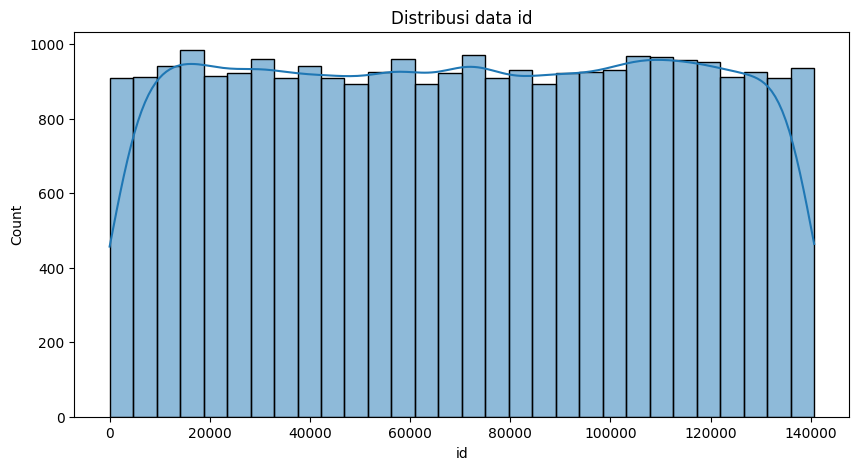

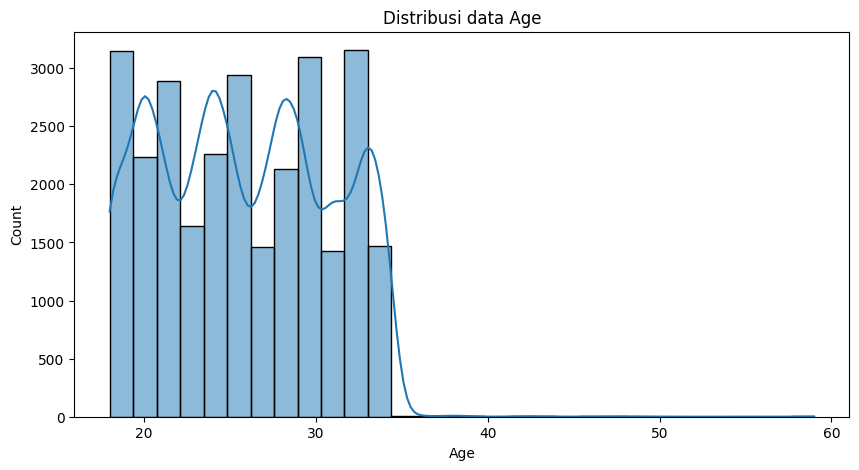

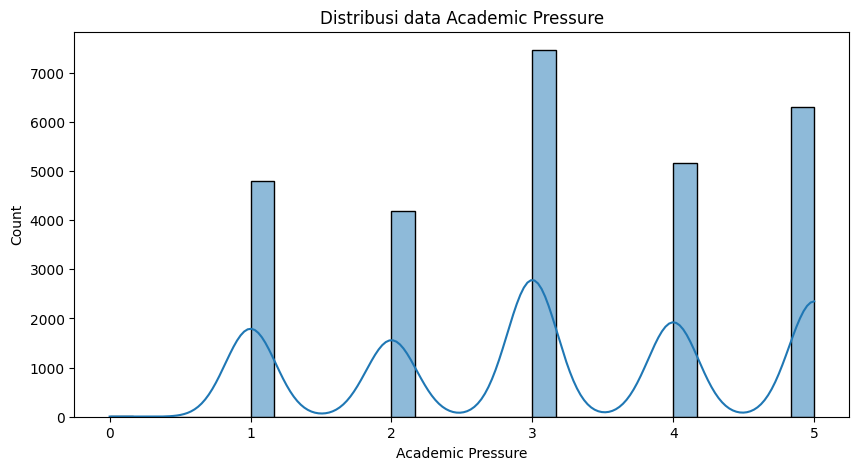

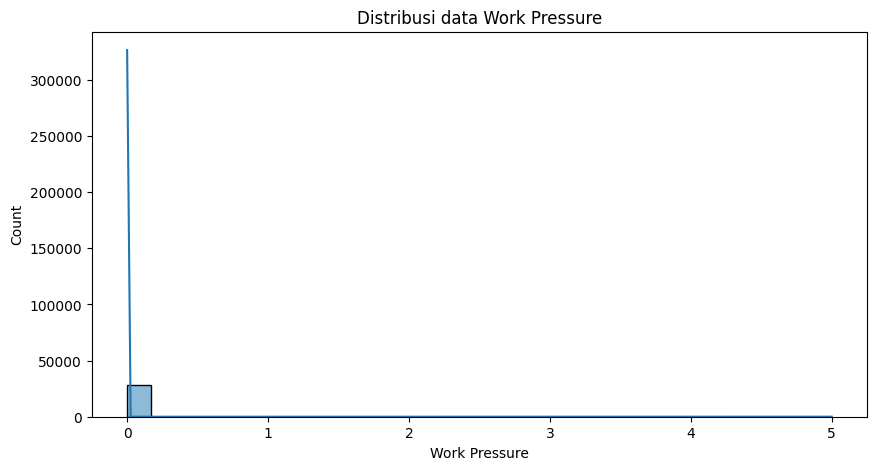

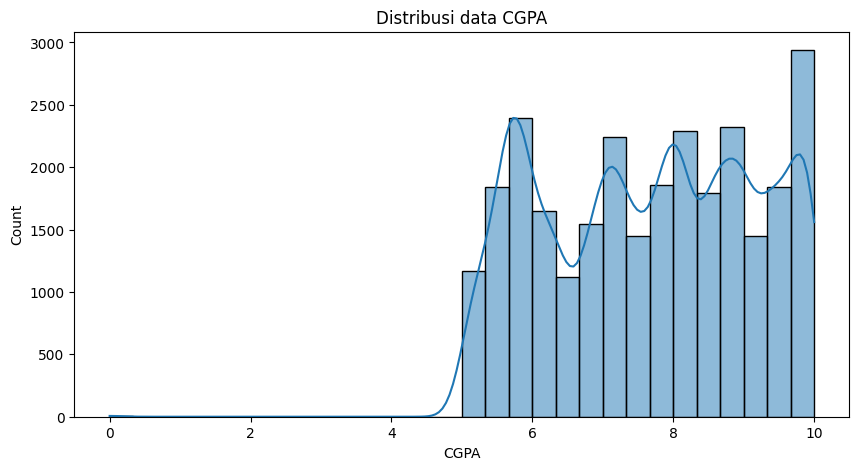

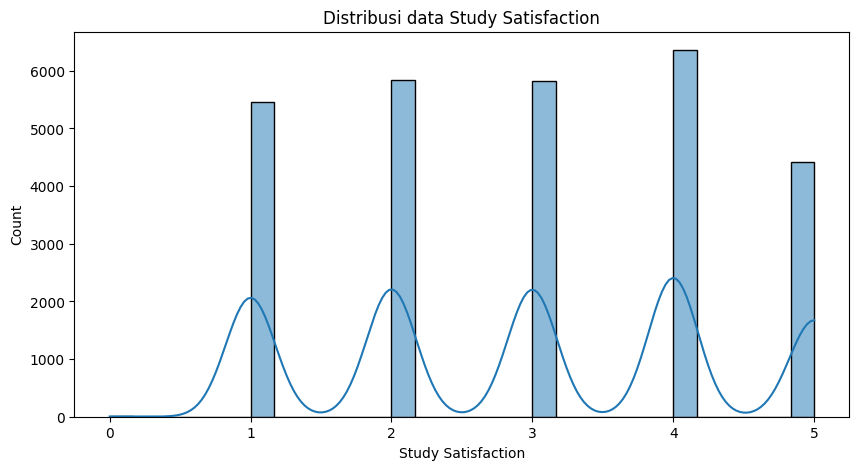

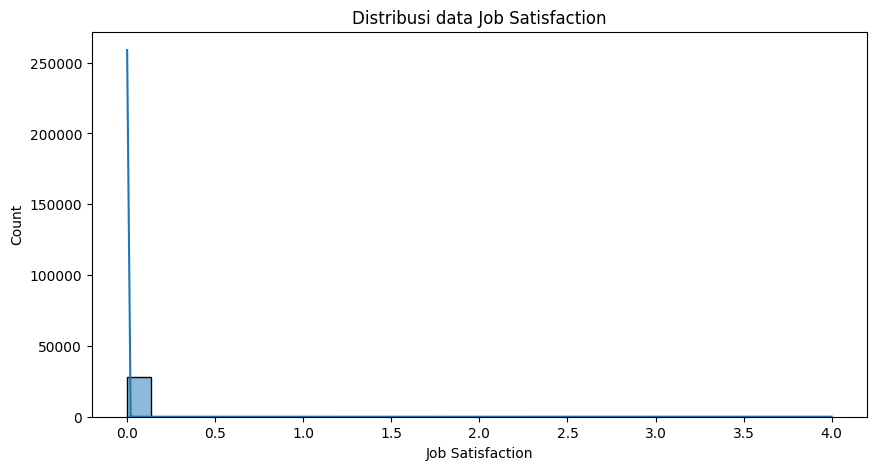

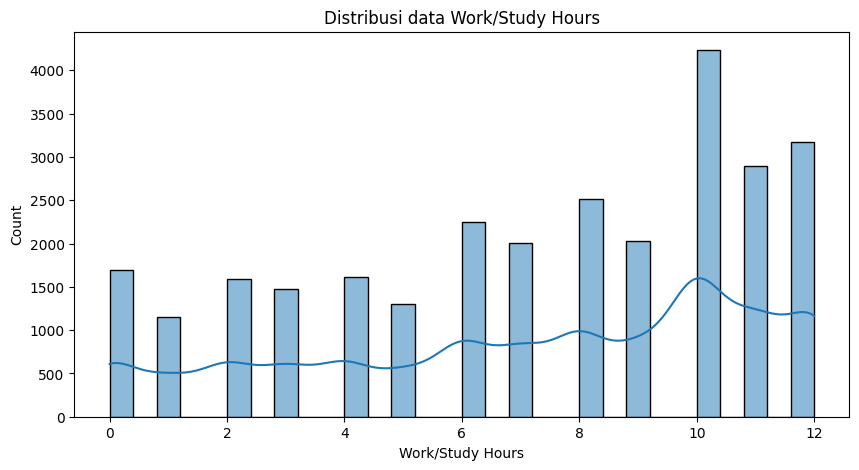

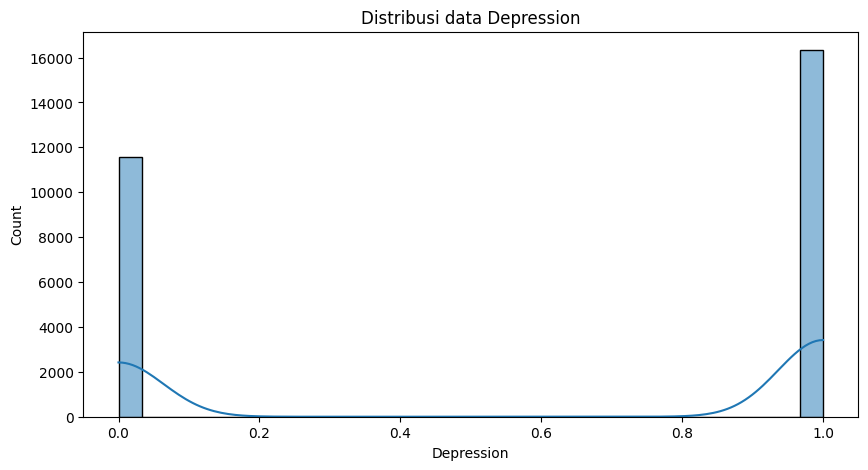

In [42]:
for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[i], kde=True, bins=30)
    plt.title(f"Distribusi data {i}")
    plt.show()

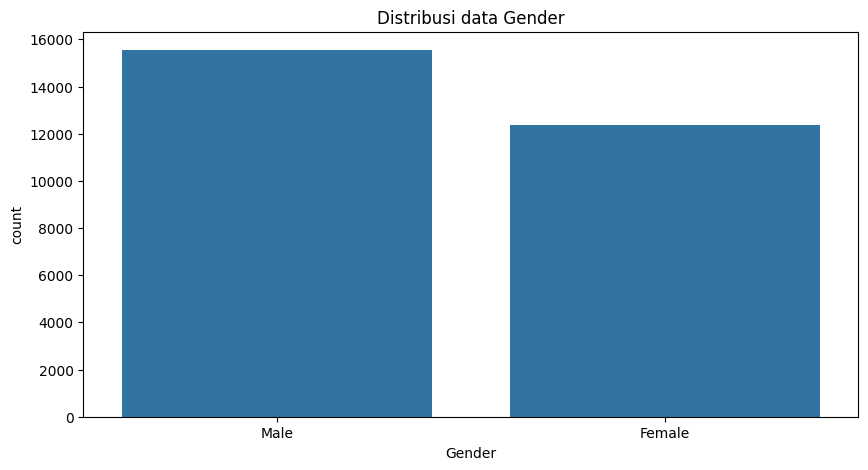

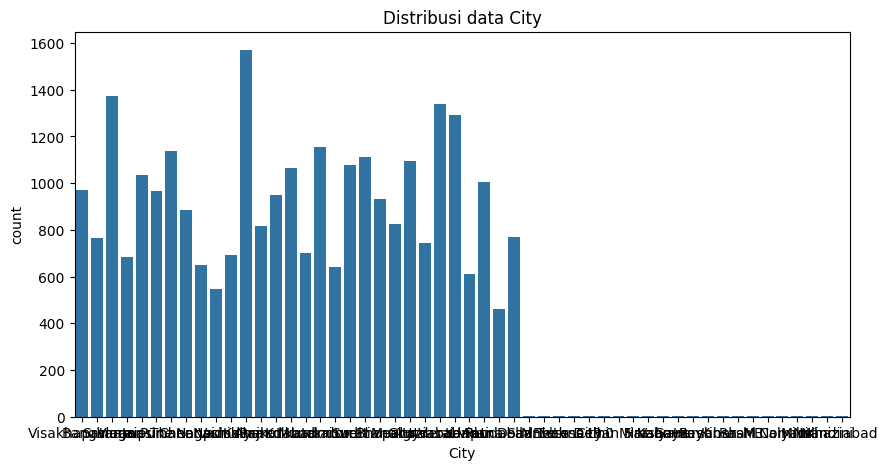

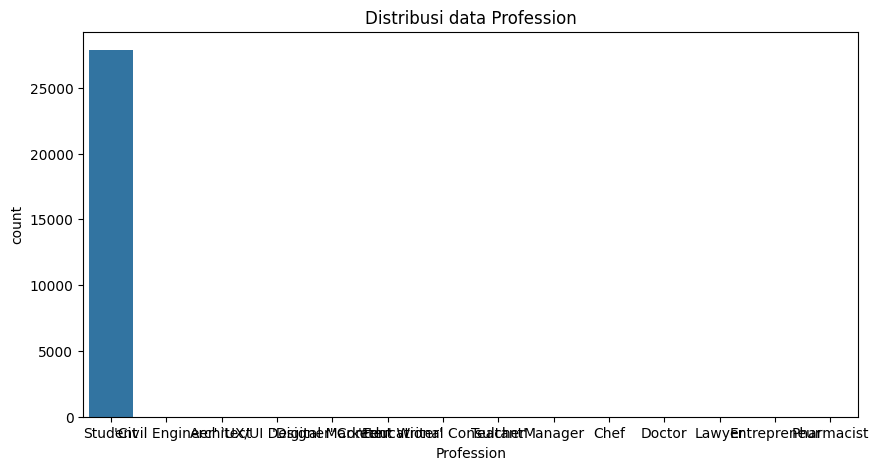

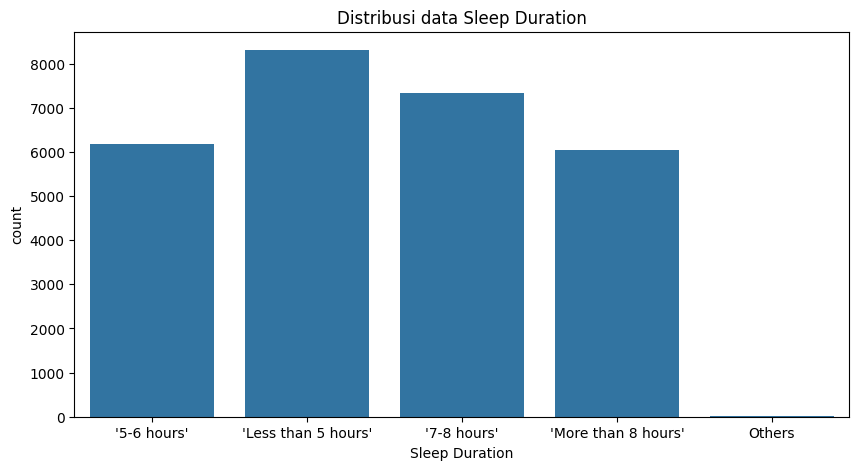

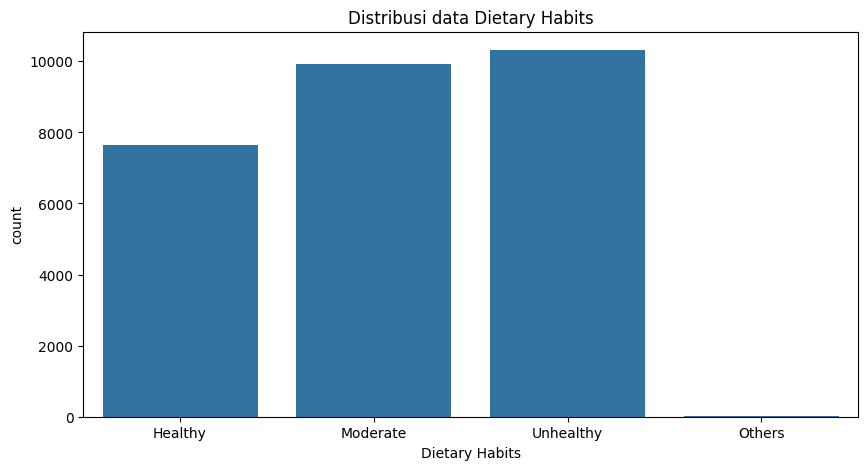

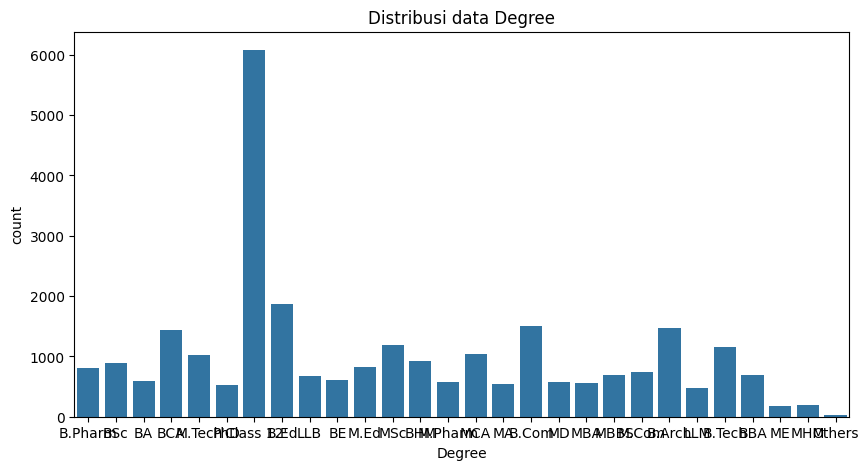

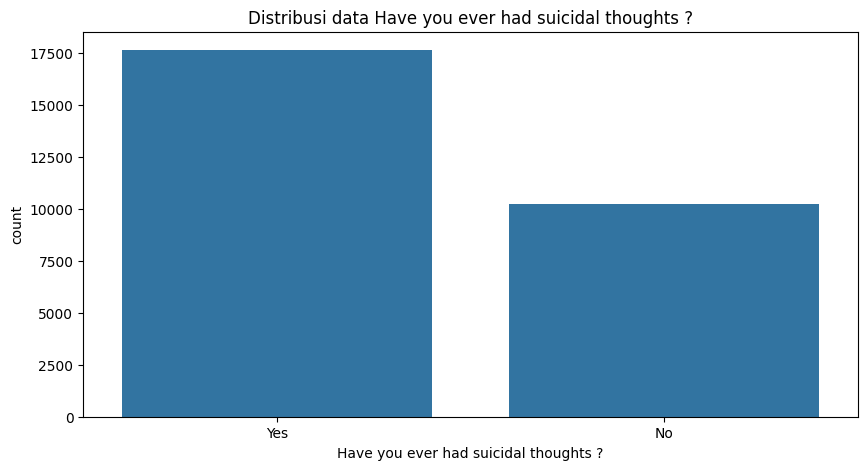

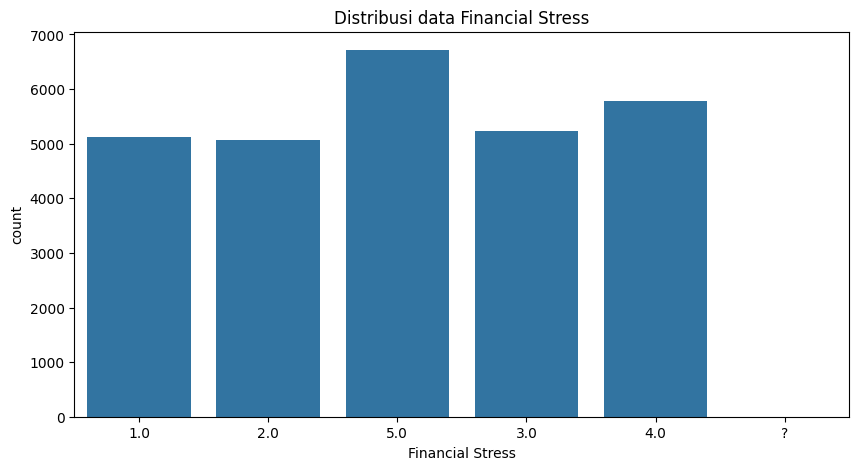

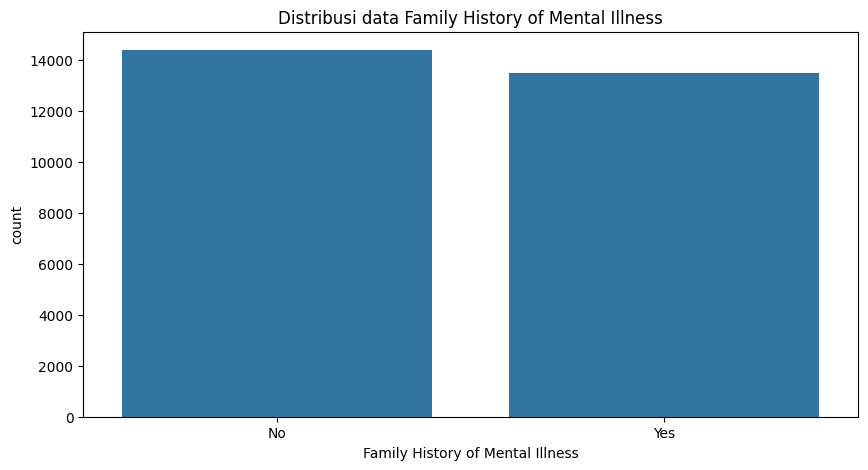

In [43]:
for i in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=i)
    plt.title(f"Distribusi data {i}")
    plt.show()

<Axes: xlabel='Gender,Study Satisfaction'>

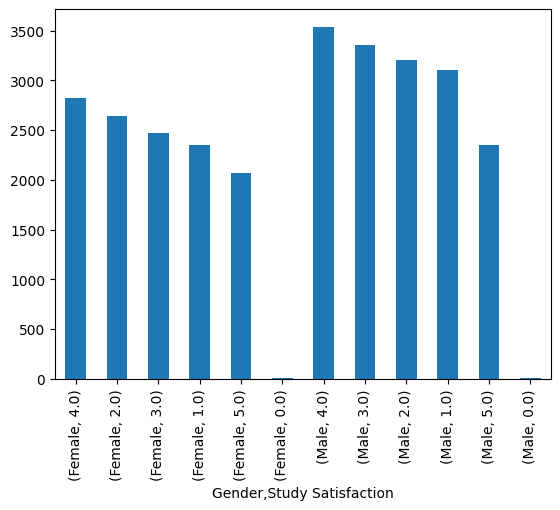

In [44]:
df.groupby('Gender')['Study Satisfaction'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

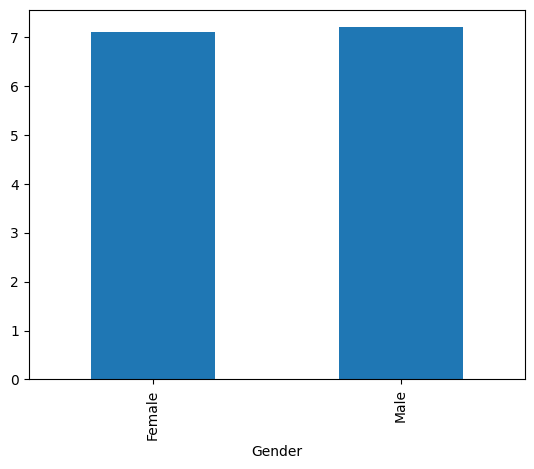

In [45]:
df.groupby('Gender')['Work/Study Hours'].mean().plot(kind='bar')

<Axes: xlabel='Sleep Duration'>

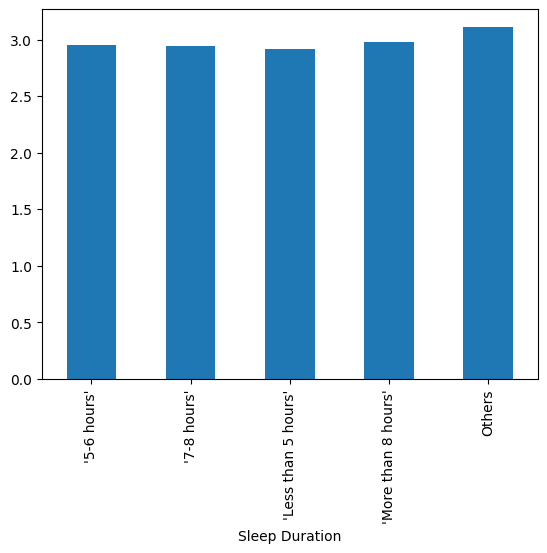

In [46]:
df.groupby('Sleep Duration')['Study Satisfaction'].mean().plot(kind='bar')

<Axes: xlabel='Dietary Habits'>

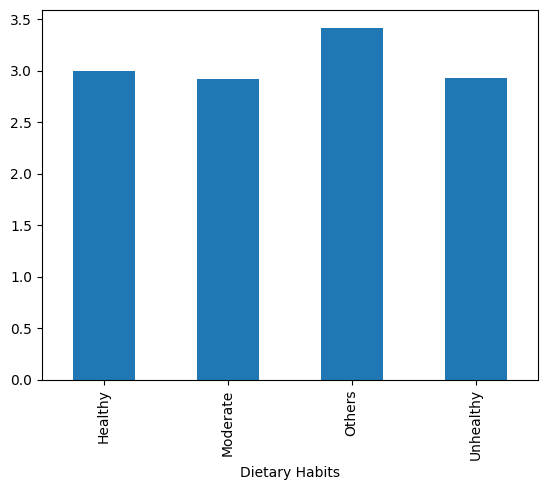

In [47]:
df.groupby('Dietary Habits')['Study Satisfaction'].mean().plot(kind='bar')

<Axes: xlabel='Gender,Have you ever had suicidal thoughts ?'>

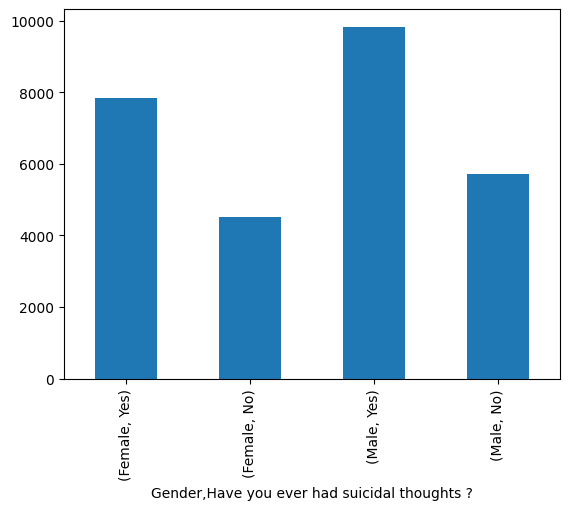

In [48]:
df.groupby('Gender')['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Financial Stress'>

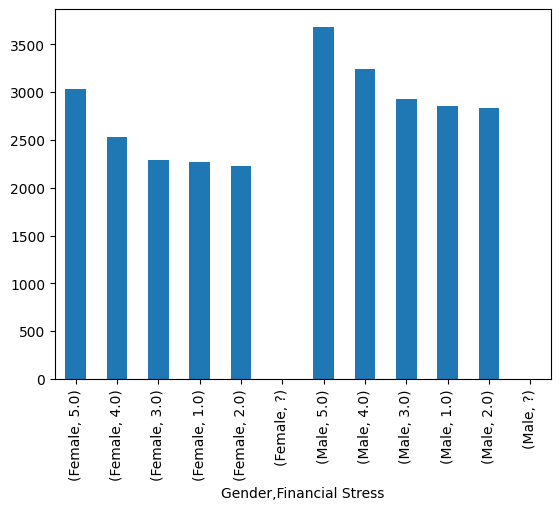

In [49]:
df.groupby('Gender')['Financial Stress'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Depression'>

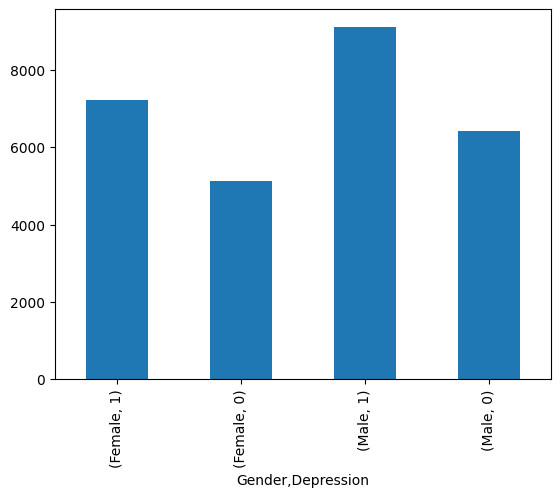

In [50]:
df.groupby('Gender')['Depression'].value_counts().plot(kind='bar')

Pada Exploratory Data Analysis dilakukan bivariate analysis dan univariate analysis hanya sebagai mencari insight faktor faktor apa saja penyebab bisa terjadinya depresi pada student, gunakanlah insight dari EDA untuk jadi patokan dalam membuat model dan mengevaluasi model

# Data Preprocessing

Dalam Data Preprocessing ada beberapa tahapan yang harus di lakukan seperti filtering umur, menangani missing value, menangani tipe data yang salah, membuat label, menstandarisasi atau scaling


In [51]:
filtered_df = df[(df['Age'] >= 13) & (df['Age'] <= 27)]
filtered_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,16574.00000,16574.000000,16574.000000,16574.000000,16574.000000,16574.000000,16574.000000,16574.000000,16574.000000
mean,70302.25715,22.374985,3.198323,0.000422,7.653351,2.916194,0.000724,7.247858,0.661096
std,40593.61072,2.795753,1.382610,0.041829,1.455275,1.376782,0.042540,3.671954,0.473352
min,8.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34954.75000,20.000000,2.000000,0.000000,6.330000,2.000000,0.000000,4.000000,0.000000
50%,70465.50000,23.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105429.00000,25.000000,4.000000,0.000000,8.910000,4.000000,0.000000,10.000000,1.000000
max,140699.00000,27.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [52]:
filtered_df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [53]:
df.duplicated().sum()

np.int64(0)

Pemisahan Categorical dan Numerical features, bisa dengan menggunakan select_dtypes jika ingin secara otomatis melakukan splitting features numerikal dan kategorikal. akan tetapi ada hal hal yang bisa menjadi bumerang ketika menggunakan opsi ini salah satunya adalah kita tidak bisa melihat atau secara eksplisit apa saja fitur yang digunakan

In [54]:
cat_features = filtered_df.select_dtypes(include='object').columns
num_features = filtered_df.select_dtypes(exclude='object').columns

penggunaan pipeline untuk numerical dan kategorikal untuk memudahkan feature engineering, di dalem pipeline dapat diisi dengan transformer seperti scaler, OneHotEncoder. Lalu setelah itu dibuat columntransformer untuk menggabungkan kedua preprocessing menjadi satu. Hal ini dibuat untuk mengefisiensikan dan membuat preprocessing lebih modular

In [55]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())

])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Splitting Features X dan y dimana X harus mendrop id dan depression karena id tidak berpengaruh apa apa, dan depression merupakan target variabel yang harusnya berada di y

In [57]:
y = df["Depression"]
X = df.drop(columns=["id", "Depression"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling
Gunakan Algoritma klasifikasi dalam menyelesaikan modelling
- RandomForestClassifier
- LogisticRegression
- XGBoost
- LightGBM

# Hyperparameter Tuning
Jika diperlukan untuk meningkatkan akurasi bisa menggunakan hyperparameter tuning, penggunaan hyperparameter tuning bisa dengan randomsearch, gridsearch atau naive bayes search

# Evaluasi
Evaluasi pada klasifikasi biasanya menggunakan Precision, Recall, f1-score, AUC, ROC